In [1]:
library(ggplot2)
library(actuar)


Attaching package: ‘actuar’


The following objects are masked from ‘package:stats’:

    sd, var


The following object is masked from ‘package:grDevices’:

    cm




**Gaia Volpi, ID = 2107759**
## Esercizio 1

1) Write the R functions for the probability density and cumulative distribution functions, using the
R naming convention:

In [2]:
################# sbagliato perchè non ho definito la condizione per zero ######################

dpois_zt = function(k,lambda){
    func = ifelse(k>0, dpois(k,lambda)/(1-dpois(0,lambda)), 0)
    return(func)
}

ppois_zt = function(k,lambda){
    return(cumsum(dpois_zt(k,lambda)))
}

Assuming λ = 1.4

2) Produce two plots showing the pdf and cdf, separately:

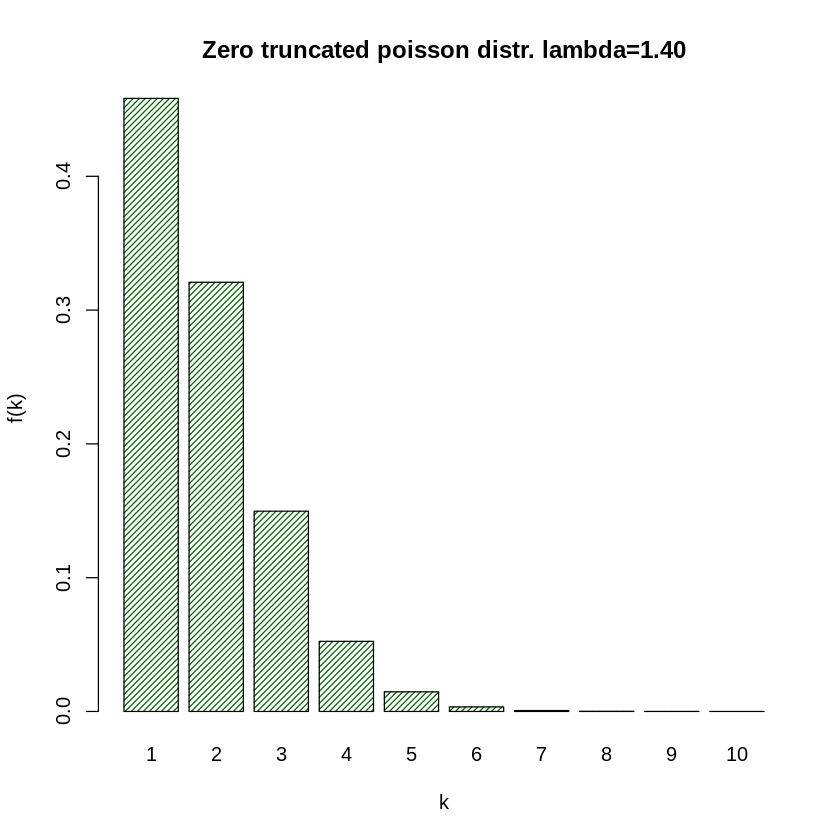

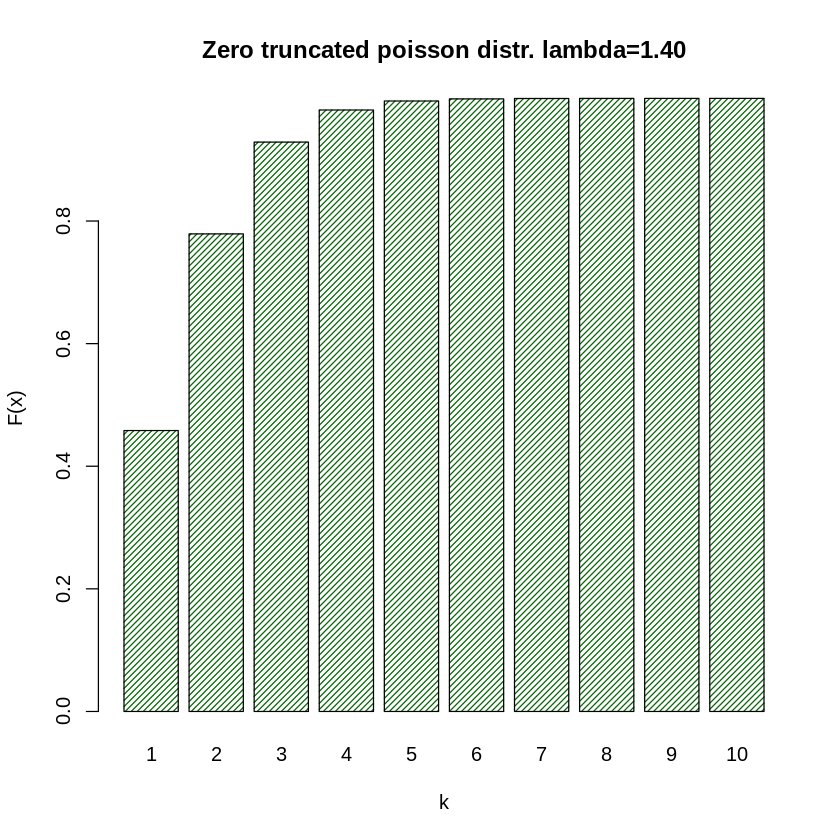

In [3]:
lambda = 1.4
k = 1:10

kp1 = dpois_zt(k,lambda)
barplot(kp1 , names=k, col='darkgreen', xlab='k', ylab='f(k)', density=30, main = sprintf("Zero truncated poisson distr. lambda=%.2f",lambda))

kp2 = ppois_zt(k,lambda)
barplot(kp2 , names=k, col='darkgreen', xlab='k', ylab='F(x)', density=30, main = sprintf("Zero truncated poisson distr. lambda=%.2f",lambda))

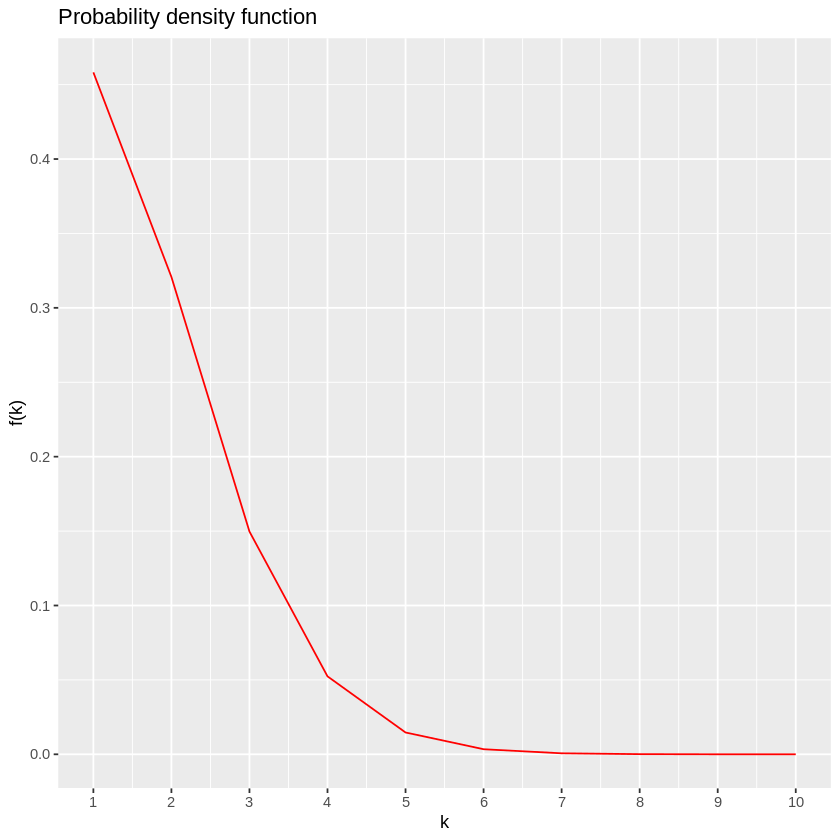

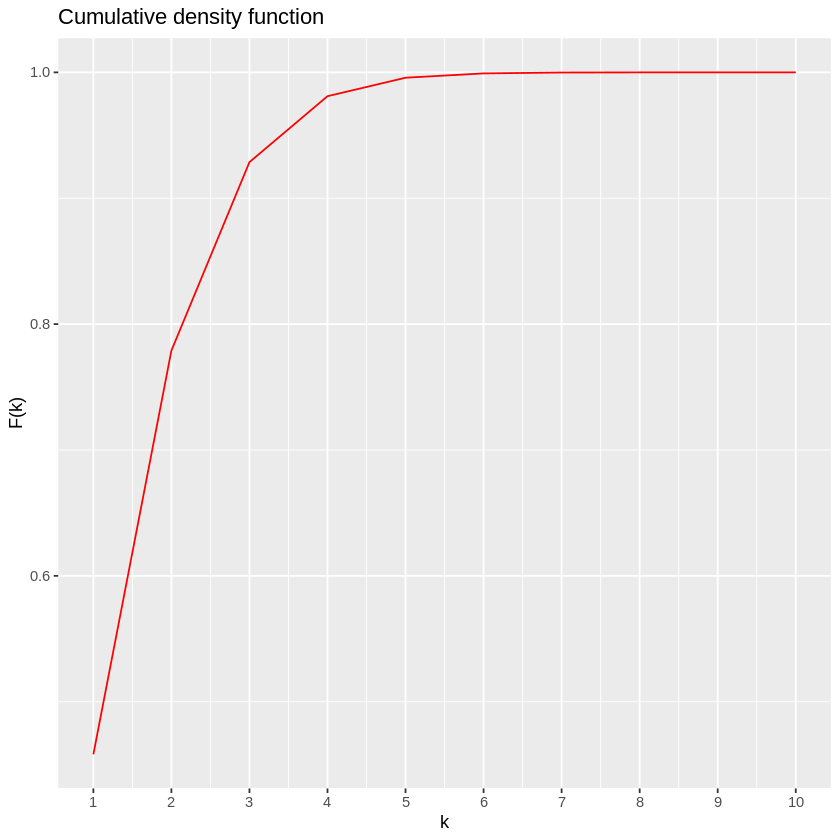

In [32]:
# more efficient way 
data = data.frame(k=k, f=dpois_zt(k,lambda), F=ppois_zt(k,lambda))

p1 = ggplot(data, aes(x=k, y=f)) + 
    geom_line(color='red') + 
    labs(title="Probability density function", x="k", y = "f(k)") + 
    scale_x_continuous(breaks = data$k)
p1 
                  
p2 = ggplot(data, aes(x=k, y=F)) + 
    geom_line(color='red') + 
    labs(title="Cumulative density function", x="k", y = "F(k)") + 
    scale_x_continuous(breaks = data$k)
p2

3) Compute the mean value and variance of the probability distribution using R:

In [33]:
lambda = 1.4
k = 1:1000

E.X = function(k,lambda){ 
    E = k*dpois_zt(k,lambda)
    return(sum(E))}

E.X2 = function(k,lambda){ 
    E = k^2*dpois_zt(k,lambda)
    return(sum(E))}

mean = E.X(k,lambda)
var = E.X2(k,lambda) - E.X(k,lambda)^2

cat(sprintf("Mean value: %.3f \n", mean))
cat(sprintf("Variance: %.3f \n", var))

Mean value: 1.858 
Variance: 1.007 


In [34]:
# efficient way
n = 1000
E.X = sum(sapply(1:n, FUN=function(k){k*dpois_zt(k,lambda)}))
E.X2 = sum(sapply(1:n, FUN=function(k){k^2*dpois_zt(k,lambda)}))

mean = E.X
var = E.X2 - E.X^2
cat(sprintf("Mean value: %.3f \n", mean))
cat(sprintf("Variance: %.3f \n", var))

Mean value: 1.858 
Variance: 1.007 


4) Generate a sample of random numbers from this distribution and show them in an histogram.
Evaluate the sample mean:

Mean value: 1.85952

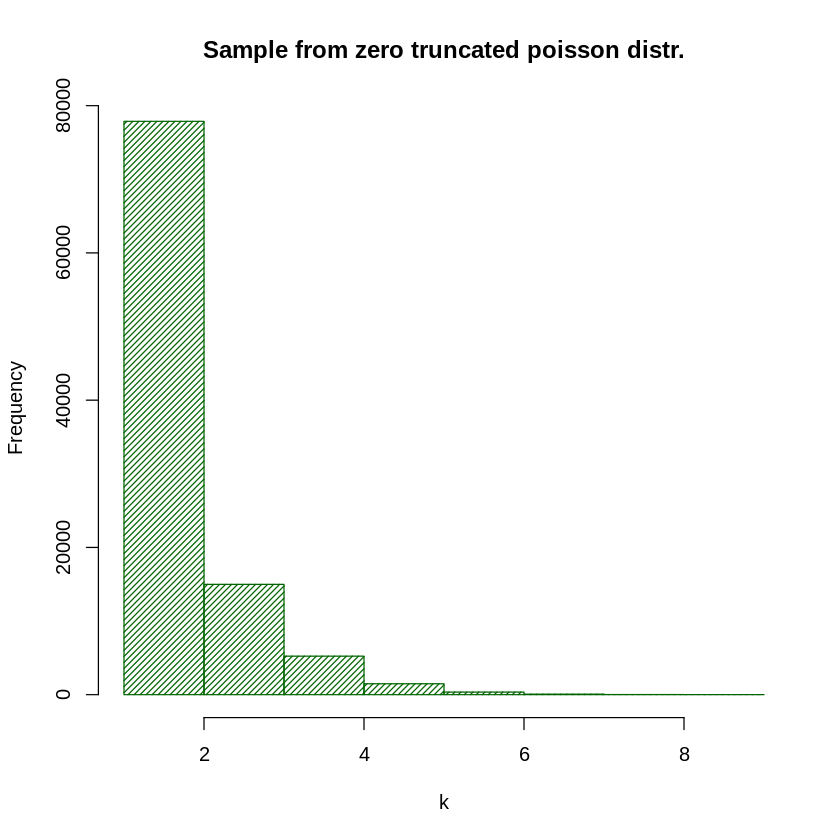

In [35]:
k = rztpois(100000, lambda)

hist(k, main="Sample from zero truncated poisson distr.", xlab="k", col='darkgreen', density=30, breaks=10)

mean_value = mean(k)
cat(paste(c("Mean value:", mean_value)))

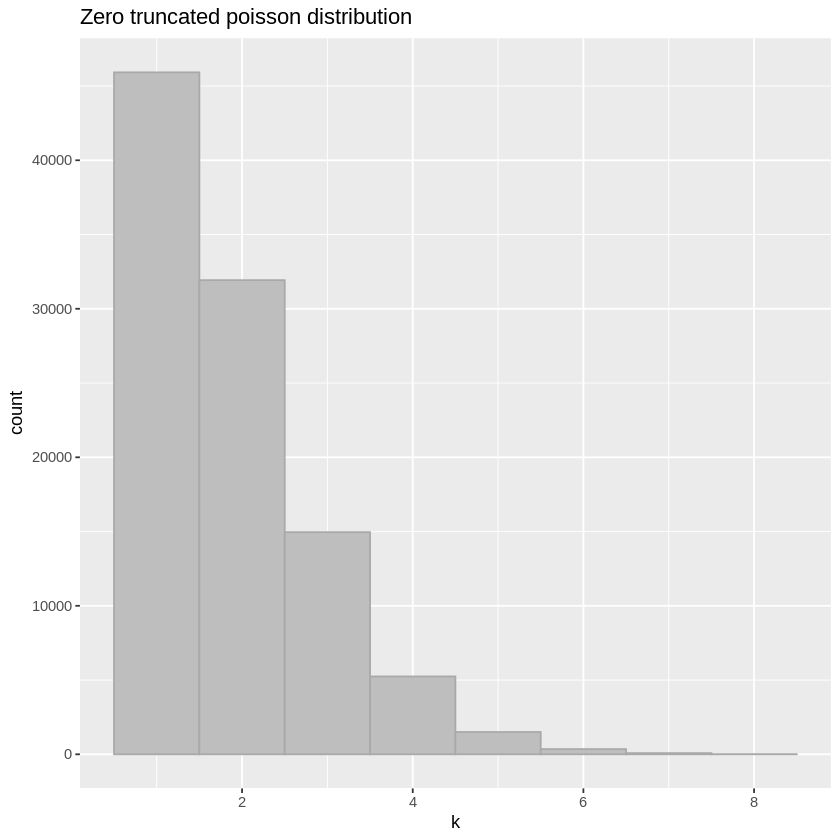

In [36]:
data = data.frame(k=rztpois(100000, lambda))

ggplot(data, aes(x=k)) +
    geom_histogram(binwidth=1, color="darkgrey", fill="grey")+
    labs(title='Zero truncated poisson distribution')

## Esercizio 2

1) Compute the normalization factor N using R:

In [37]:
#not efficient, try to use vectorized operations instead of for loops
pdf = function(E, E0=7.25, gamma=2.7){
    f = c(0)
    for (energy in(E)){
    if (energy<E0){
        f = append(f,1) }
    else{
            f = append(f, (energy-E0+1)^(-gamma)) }
    }
    return(f[-1])}

int = integrate(pdf, 0, +Inf)$value
N = 1/int

cat(paste(c("Normalization factor:", N)))

Normalization factor: 0.127579703198913

In [38]:
# correct version
pdf1 = function(E, E0=7.25, gamma=2.7){
    prob = ifelse(E<E0, 1, (E-E0+1)^(-gamma))
    return(prob)
}

N = 1/integrate(pdf1, 0, +Inf)$value
cat(paste(c("Normalization factor:", N)))

Normalization factor: 0.127579703198913

2) Plot the probability density function in R:

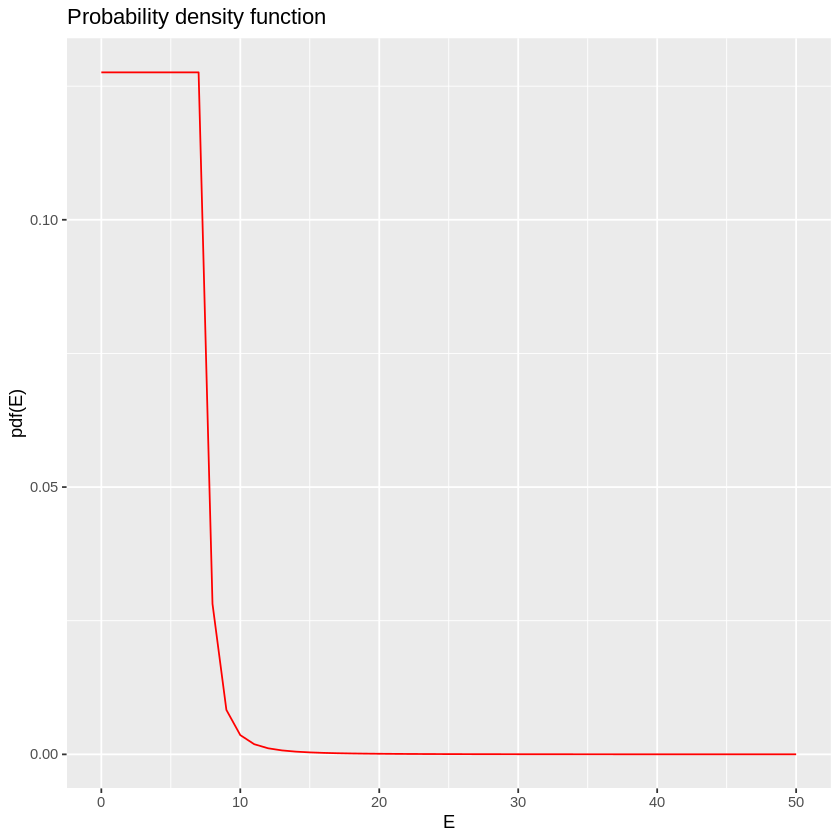

In [39]:
E = 0:50
y = N*sapply(E, pdf1) #normalized
data = data.frame(E=E, f=y)

ggplot(data, aes(x=E, y=f)) +
geom_line(color='red') + 
labs(title='Probability density function', x='E', y='pdf(E)')

3) Plot the cumulative density function in R:

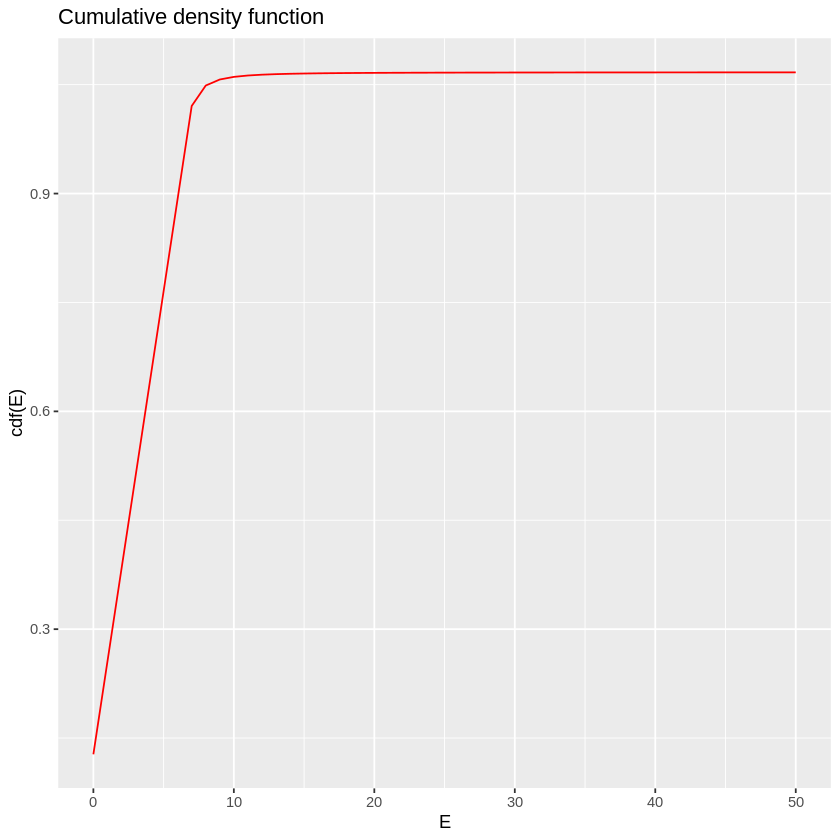

In [41]:
y = cumsum(N*sapply(E, pdf1))
data = data.frame(E=E, f=y)

ggplot(data, aes(x=E, y=f)) +
geom_line(color='red') + 
labs(title='Cumulative density function', x='E', y='cdf(E)')

4) Compute the mean value using R:

In [42]:
E.X = integrate(function(E) {E*N*pdf1(E)}, lower=0, upper=+Inf)
E.X2 = integrate(function(E) {E^2*N*pdf1(E)}, lower=0, upper=+Inf)

mean = E.X$value
var = E.X2$value - (E.X$value)^2

cat(paste(c("Mean value:", mean,'\n')))
cat(paste(c("Variance:", var,'\n')))

Mean value: 4.0042508046789 
Variance: 4.95618681781467 


## Esercizio 3

Suppose that the average number of accidents at an intersection is two per day.
1) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur
tomorrow:

In [43]:
mu = 2
k = 5
P = mu/k
cat(paste(c("The upper limit to the probability of having at least five accidents tomorrow is:", P)))

The upper limit to the probability of having at least five accidents tomorrow is: 0.4

2) Using Poisson random variables, calculate the probability that at least five accidents will occur
tomorrow. Compare this value with the bound obtained in the previous point:

In [49]:
#### qui sono tonta e usavo dpois() e mi trovavo la probabilità di avere cinque incidenti, ma non di più

P = 1 - ppois(4, lambda=mu)
cat(paste(c(sprintf("The probability of having at least five accidents tomorrow, using Poisson random variables, is %.3f", P)))) 

The probability of having at least five accidents tomorrow, using Poisson random variables, is 0.053

3) Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a
bound on the probability that tomorrow at least five accidents will occur:

In [48]:
var = 2
k = (5 - mu)
P = var / k^2
cat(paste(c("The upper limit to the probability of having at least five accidents tomorrow is:", P)))

The upper limit to the probability of having at least five accidents tomorrow is: 0.222222222222222

## Esercizio 4

The waiting period from the time a book is ordered until it is received is a random variable with mean
seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by
certain date, how early should she order the book?


In [50]:
mu = 7 # mean
var = 2
P_upper = 0.05 # if we want to be at least 95% sure
k = var/sqrt(P_upper) # using Chebyshev’s inequality
x = k + mu
cat(paste(c("To be at least 95% sure to recive a book by a certain date, Helen has to order the book at least", round(x,digits=0), "days early")))

To be at least 95% sure to recive a book by a certain date, Helen has to order the book at least 16 days early

## Esercizio 5
<span style="color:red">
An ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find
an upper bound for the probability that, at most, 10 pairs consist of a black and a red card:
<span>

In [57]:
A = 26*26
B = 26*25
n = 26
N = A+B

mean = n*A/N
var = n*A*(N-A)/N^2 * (1-(n-1)/(N-1))

k = abs(mean-10)
cat('An upper bound for this problem is:', var/(k^2))

An upper bound for this problem is: 0.6017249

## Esercizio 6

In a stationary bus at the departure station, a passenger gets on the bus, on average every 30
seconds.
1) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability
of having less than 4 passenger after 3 minutes.

We assume the event to be a poisson process:

In [58]:
lambda = 2 #number of passenger per minute

n1 = 6 #number of passengers
P1 = 1 - ppois(n1, lambda*2)
cat(paste(c("The probability of getting more than 6 passenger after 2 minutes is", round(P1,digits=2), "\n")))

n2 = 3
P2 = ppois(n2, lambda*3)
cat(paste(c("The probability of getting less than 4 passenger after 3 minutes is", round(P2,digits=2))))

The probability of getting more than 6 passenger after 2 minutes is 0.11 
The probability of getting less than 4 passenger after 3 minutes is 0.15

2) Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf:

The distribution is gamma:

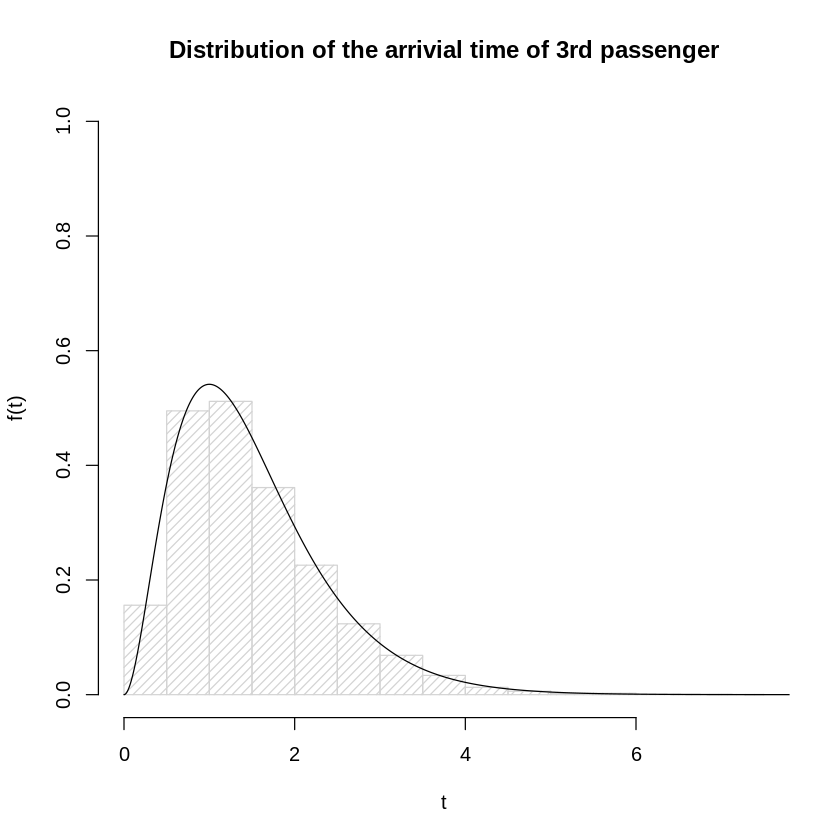

In [62]:
t = rgamma(n=10000, shape=3, rate=lambda)
tp = seq(0, 8, length=1000)

hist(t, density=20, breaks=20, prob=TRUE, xlab="t", ylab='f(t)', ylim=c(0:1), main='Distribution of the arrivial time of 3rd passenger')
lines(tp, dgamma(tp, shape=3, rate=lambda), type='l')

3) Repeat the procedure of the point 2) for the difference in arrival time between the fifth and the
first passenger:

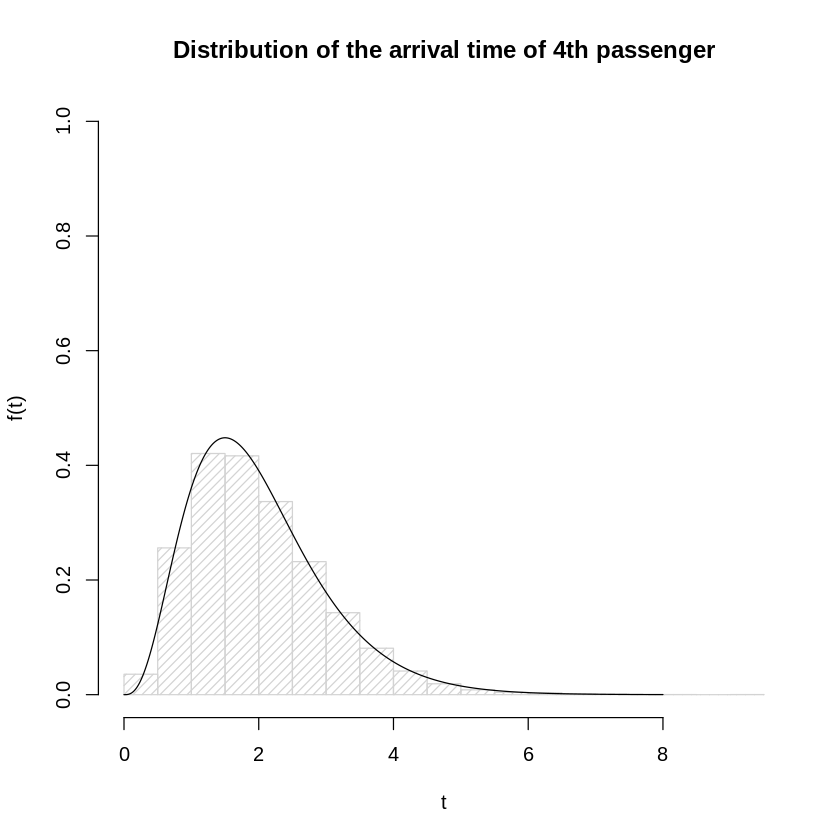

In [63]:
t = rgamma(n=10000, shape=4, rate=lambda)
tp = seq(0, 8, length=1000)

hist(t, density=20, breaks=20, prob=TRUE, xlab="t", ylab='f(t)', ylim=c(0:1), main='Distribution of the arrival time of 4th passenger')
lines(tp, dgamma(tp, shape=4, rate=lambda), type='l')